In [1]:
import sys; sys.path.append('../')

In [50]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
sns.set_palette('colorblind')

In [9]:
# Data loc
save_dir = '../experiments/results/pendigits_shapelets'

In [111]:
# Load data
shapelets = torch.load(save_dir + '/old_50/shapelets.pt')
lengths = torch.load(save_dir + '/old_50/lengths.pt')
minimizers = torch.load(save_dir + '/old_50/minimizers.pt')

In [112]:
# To map index to 0 to 9
class_map = torch.argsort(torch.Tensor([8, 2, 1, 4, 6, 0, 5, 9, 7, 3]))

In [113]:
# Remap
shapelets = shapelets[class_map]
lengths = lengths[class_map]
minimizers = minimizers[class_map]

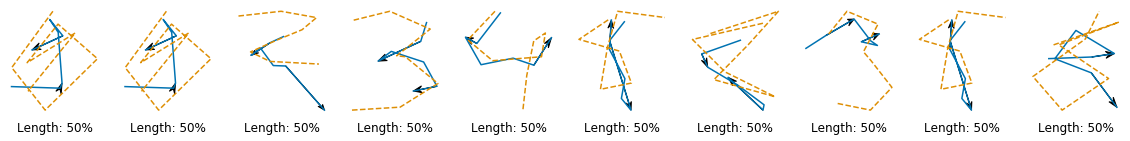

In [114]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    shapelet, minimizer, length = shapelets[i], minimizers[i], lengths[i]
    ax[i].plot(shapelet[:, 0], shapelet[:, 1], label='Learnt shapelet')
    ax[i].plot(minimizer[:, 0], minimizer[:, 1], label='Training set minimizer', ls='--')
    
    # Add an arrow
    xdata, ydata = shapelet[:, 0], shapelet[:, 1]
    arw_i = 3   # Start index of the arrow
    for arw_i in [1, 5]:
        ax[i].arrow(xdata[arw_i], ydata[arw_i], xdata[arw_i+1]-xdata[arw_i], ydata[arw_i+1]-ydata[arw_i], 
                 length_includes_head=True, head_width=0.2, color='black', overhang=0.4)
    
    ax[i].set_title('Length: {:.0f}%'.format(100 * length / 7), y=-0.2)
    
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].axis('off')

plt.savefig('../paper/images/pendigits/old_shapelets_noborder.png', dpi=300, bbox_inches='tight')